***О проекте:***

В современном мире цифровизация финансовых услуг приводит к росту числа электронных транзакций, что, в свою очередь, повышает риск мошеннических операций. Обнаружение таких аномалий становится критически важным для обеспечения безопасности клиентов и финансовых институтов. В данном проекте мы сосредоточимся на выявлении мошеннических транзакций по кредитным картам с использованием методов машинного обучения.

***Цели проекта***

**1. Изучение и анализ данных:**

Провести детальный исследовательский анализ набора данных, чтобы понять структуру и особенности транзакций.
Выявить ключевые признаки, влияющие на классификацию транзакций как мошеннических или нормальных.

**2. Предобработка и подготовка данных:**

Осуществить очистку данных.
Нормализовать и масштабировать данные для улучшения работы алгоритма кластеризации.

**3. Применение алгоритма DBSCAN:**

Настроить и применить алгоритм DBSCAN для кластеризации транзакций.
Обнаружить аномальные транзакции, которые могут быть потенциально мошенническими.


**4. Оценка эффективности модели:**

Использовать подходящие метрики (например, точность, полноту, F1-мера) для оценки работы алгоритма.
Сравнить результаты с реальными метками мошеннических транзакций для проверки точности обнаружения.


**5. Визуализация результатов:**

Визуализировать кластеры и аномалии с помощью методов снижения размерности для наглядного представления данных.
Построить графики и диаграммы для иллюстрации обнаруженных закономерностей.
Разработка рекомендаций и выводов:

Предложить возможные улучшения модели на основе полученных результатов.
Обсудить потенциал применения данного подхода в реальных системах обнаружения мошенничества.



***Описание датасета:***

Для анализа мы используем набор данных Credit Card Fraud Detection Dataset с платформы Kaggle. Этот датасет содержит анонимные данные о транзакциях европейских держателей кредитных карт за сентябрь 2013 года. В общей сложности он включает 284,807 транзакций, из которых 492 являются мошенническими. Данные сбалансированы и подготовлены таким образом, чтобы обеспечить конфиденциальность клиентов, сохраняя при этом важные статистические свойства для анализа.

***Метод выявления:***

В качестве основного алгоритма мы применяем метод кластеризации DBSCAN. Алгоритм не требует предварительного задания количества кластеров и эффективно выявляет объекты, которые отличаются от плотных областей данных, то есть потенциальные аномалии. Использование DBSCAN позволяет нам обнаруживать мошеннические транзакции, рассматривая их как выбросы или шум по сравнению с нормальным поведением пользователей.

In [1]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
class_counts = data['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


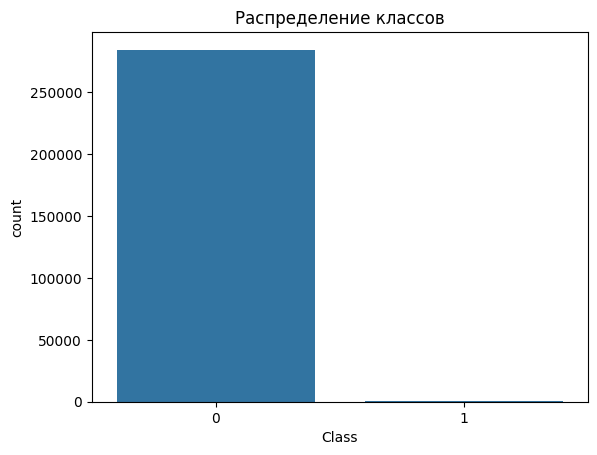

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=data)
plt.title('Распределение классов')
plt.show()

Мы провели предварительный анализ данных. В этом наборе данных классы сильно несбалансированы, важно учесть при моделировании. Пропусков нет.

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


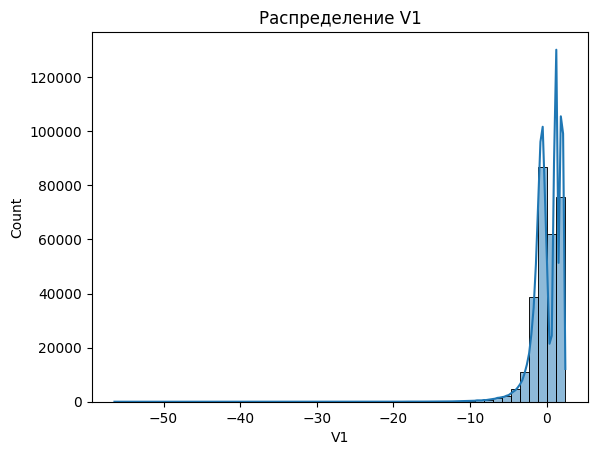

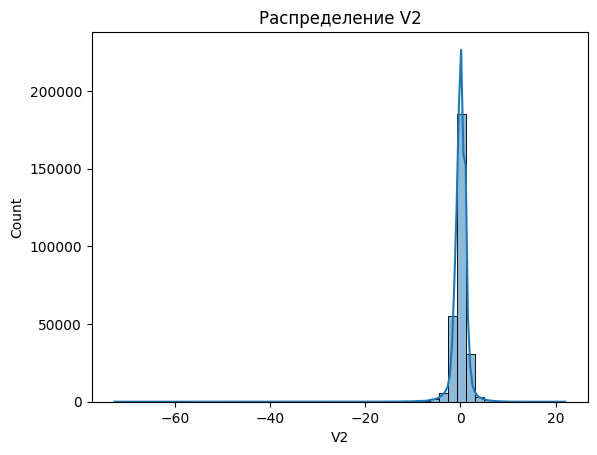

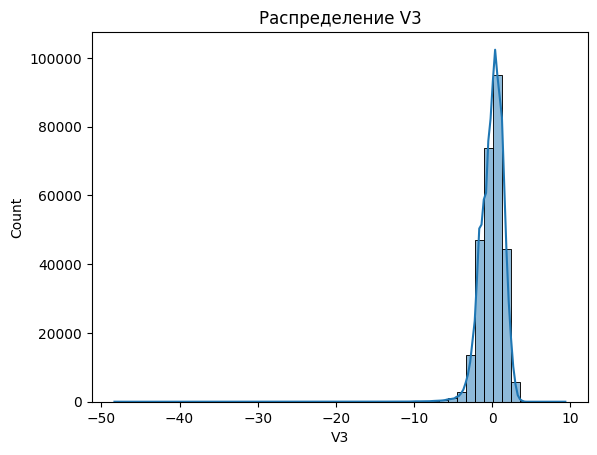

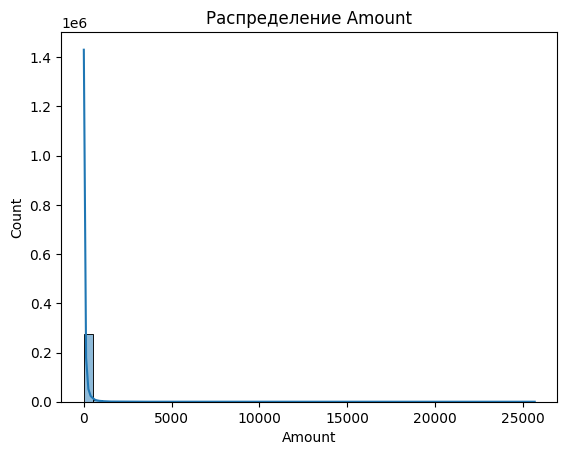

In [9]:
features = ['V1', 'V2', 'V3', 'Amount']

for feature in features:
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Распределение {feature}')
    plt.show()

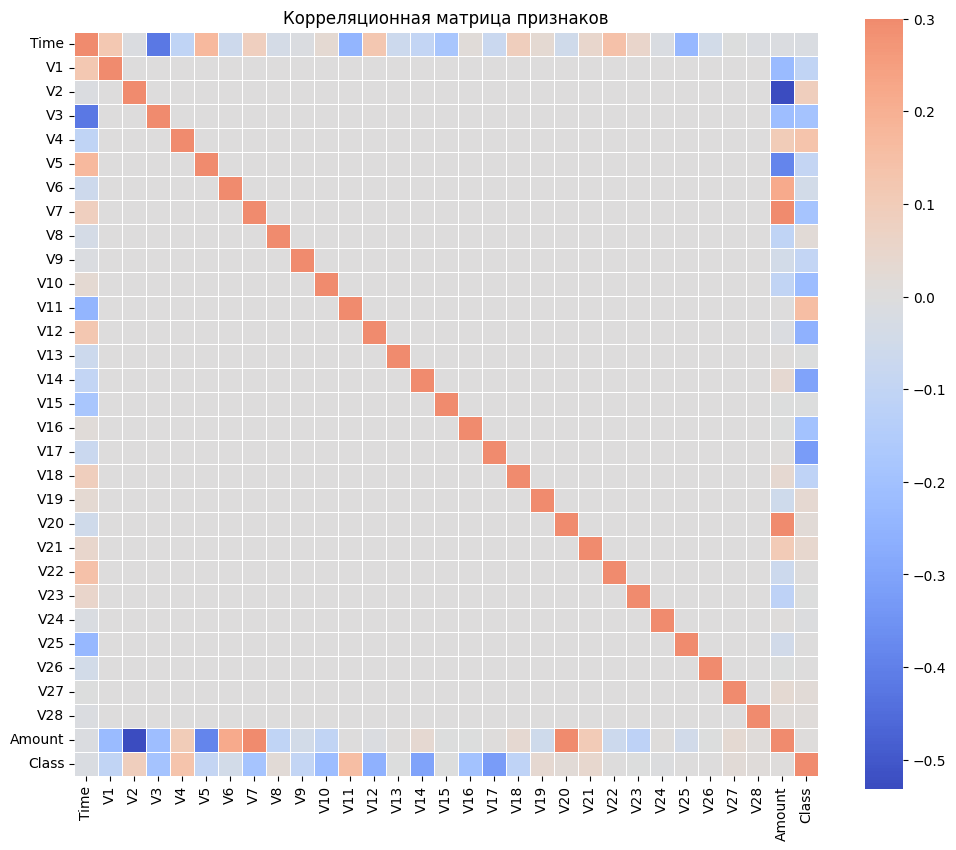

In [10]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=0.3, center=0, square=True, linewidths=.5)
plt.title('Корреляционная матрица признаков')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

#Подготовка данных для кластеризации

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Class', axis=1))

#Преобразование данных в DataFrame

data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])

In [4]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(data_scaled)
data['Cluster'] = dbscan.labels_

labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Количество кластеров: {n_clusters}')
print(f'Количество выбросов: {n_noise}')

Количество кластеров: 1260
Количество выбросов: 98184


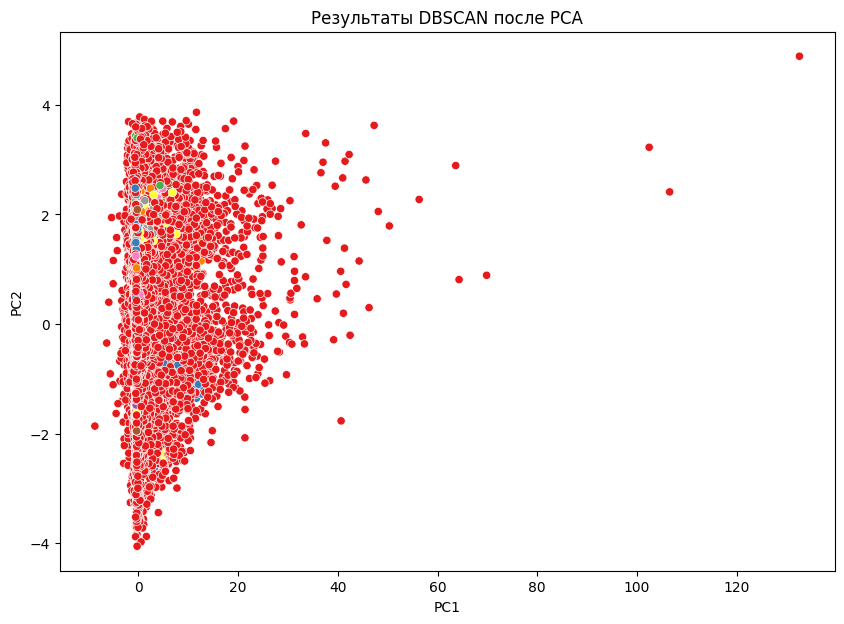

In [16]:
from sklearn.decomposition import PCA

#Визуализация кластеров

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, palette='Set1', legend=False)
plt.title('Результаты DBSCAN после PCA')
plt.show()

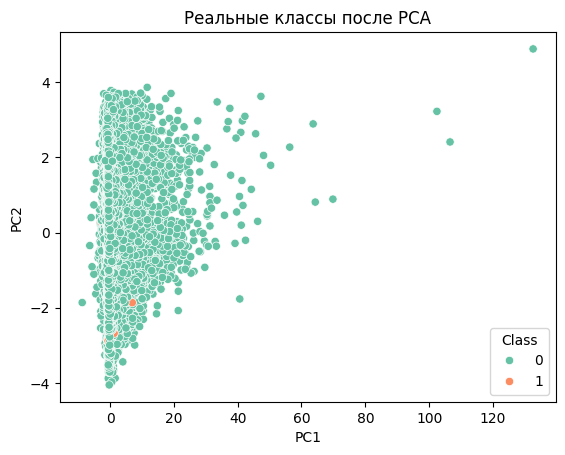

In [18]:
#Сравнение с реальными аномалиями

sns.scatterplot(x='PC1', y='PC2', hue='Class', data=data, palette='Set2', legend='full')
plt.title('Реальные классы после PCA')
plt.show()

In [26]:
# Вычисление Silhouette Score на подвыборке данных
sample_size = 10000

if n_clusters > 1 and data_scaled.shape[0] > sample_size:
    # Случайная подвыборка индексов
    random_indices = np.random.choice(data_scaled.shape[0], size=sample_size, replace=False)

    # Выбираем подвыборку данных и соответствующие метки
    data_sample = data_scaled.iloc[random_indices]
    labels_sample = labels[random_indices]

    # Вычисляем Silhouette Score
    score = silhouette_score(data_sample, labels_sample)
    print(f'Silhouette Score (на подвыборке): {score}')
else:
    print('Недостаточно данных или кластеров для вычисления Silhouette Score')

Silhouette Score (на подвыборке): -0.16639217571098902


Отрицательное значение (-0.1664) указывает на то, что алгоритм DBSCAN не смог эффективно разделить данные на осмысленные кластеры с текущими, случайно подобранными параметрами.


Объекты, вероятно, находятся ближе к соседним кластерам, чем к своему собственному, что свидетельствует о проблемах с кластеризацией.



**Возможные причины отрицательного Silhouette Score:**

Неподходящие параметры DBSCAN:

Значения eps и min_samples могут быть не оптимальными для ваших данных.
Параметр eps=1.5 может быть слишком большим или маленьким, влияя на формирование кластеров.
Высокая размерность и особенности данных:

Данные имеют высокую размерность, что может затруднять обнаружение кластеров.
Мошеннические транзакции составляют очень маленькую долю данных (~0.17%), что усложняет их выявление.
Отсутствие явной кластерной структуры:

Возможно, данные не имеют четкой кластерной структуры, которую может обнаружить DBSCAN.


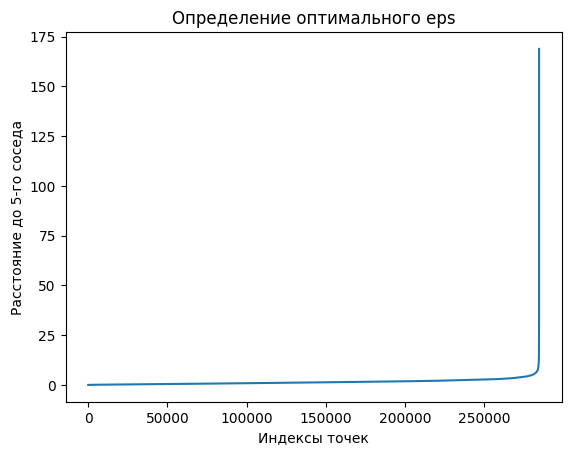

In [27]:
from sklearn.neighbors import NearestNeighbors

# Используем метод k-distance для для определения оптимального значения eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('Определение оптимального eps')
plt.xlabel('Индексы точек')
plt.ylabel('Расстояние до 5-го соседа')
plt.show()

Как видим, необходимо произвести перебор гиперпараметров.

Топ 10 результатов по F1-мерам:
    eps  min_samples  n_clusters  n_noise  precision    recall  f1_score
15    4           10           3      786   0.407125  0.650407  0.500782
14    4            7           8      688   0.361919  0.506098  0.422034
19    5           10           3      388   0.440722  0.347561  0.388636
11    3           10           4     1689   0.238603  0.819106  0.369555
13    4            5          15      606   0.323432  0.398374  0.357013
10    3            7           8     1592   0.232412  0.752033  0.355086
9     3            5          14     1477   0.228842  0.686992  0.343321
18    5            7           6      332   0.397590  0.268293  0.320388
12    4            3          29      515   0.285437  0.298780  0.291956
8     3            3          48     1281   0.199844  0.520325  0.288776


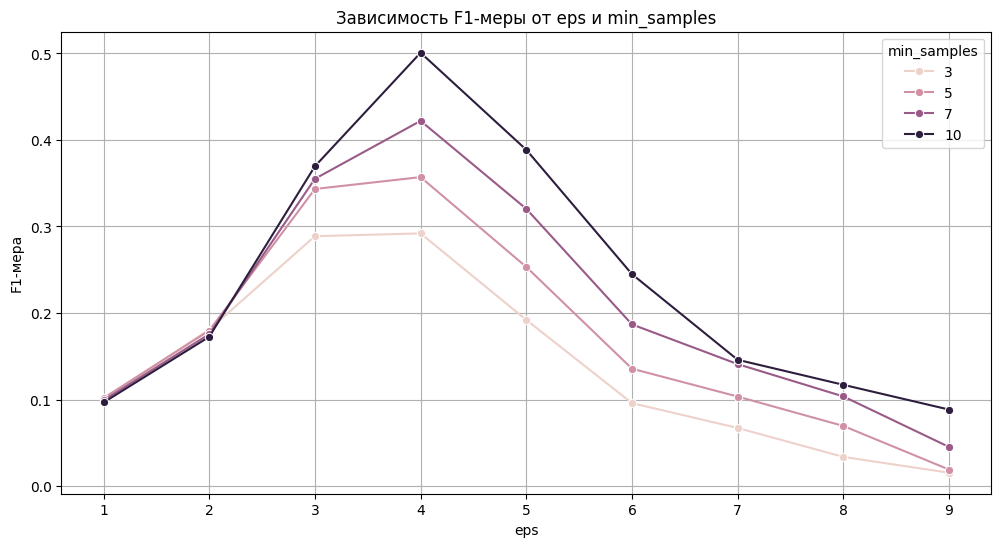

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score

# Перебор параметров и оценка модели

fraud = data[data['Class'] == 1]

# Выбираем случайную подвыборку нормальных транзакций (например, 10 000)
normal_sample_size = 10000
normal = data[data['Class'] == 0].sample(n=normal_sample_size, random_state=42)

# Объединяем мошеннические и нормальные транзакции
data_subset = pd.concat([fraud, normal])

# Обновляем индексы
data_subset.reset_index(drop=True, inplace=True)

# Предобработка данных

# Выделяем признаки и целевую переменную
X = data_subset.drop(['Class'], axis=1)
y = data_subset['Class']

# Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Диапазоны значений для перебора
eps_values = np.arange(1, 10, 1)  # Значения eps от 1 до 9
min_samples_values = [3, 5, 7, 10]  # Различные значения min_samples

# Сохраним результаты в списке
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        dbscan.fit(X_scaled)
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Предсказания: аномалии = 1 (Cluster = -1), нормальные = 0
        y_pred = np.where(labels == -1, 1, 0)

        # Вычисляем метрики
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)

        # Сохраняем результаты
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

# Преобразуем результаты в DataFrame для удобства анализа
results_df = pd.DataFrame(results)

# Анализ результатов

# Сортируем по F1-мерам
best_results = results_df.sort_values(by='f1_score', ascending=False).head(10)
print("Топ 10 результатов по F1-мерам:")
print(best_results)

# Визуализация метрик

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x='eps', y='f1_score', hue='min_samples', marker='o')
plt.title('Зависимость F1-меры от eps и min_samples')
plt.xlabel('eps')
plt.ylabel('F1-мера')
plt.legend(title='min_samples')
plt.grid(True)
plt.show()

In [12]:
#Применение модели DBSCAN с лучшими параметрами

best_eps = 4
best_min_samples = 10
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, n_jobs=-1)
dbscan.fit(X_scaled)
labels = dbscan.labels_

# Добавляем метки кластеров в данные
data_subset['Cluster'] = labels

# Количество кластеров и выбросов
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Количество кластеров: {n_clusters}')
print(f'Количество выбросов (аномалий): {n_noise}')

# Аномалии имеют метку -1
anomalies = data_subset[data_subset['Cluster'] == -1]

# Количество обнаруженных мошеннических транзакций
true_positives = anomalies[anomalies['Class'] == 1]
false_positives = anomalies[anomalies['Class'] == 0]

num_true_positives = len(true_positives)
num_false_positives = len(false_positives)
total_fraud = len(fraud)

print(f'Обнаружено мошеннических транзакций: {num_true_positives} из {total_fraud}')
print(f'Ложноположительные срабатывания: {num_false_positives}')

Количество кластеров: 3
Количество выбросов (аномалий): 786
Обнаружено мошеннических транзакций: 320 из 492
Ложноположительные срабатывания: 466


**Выводы по проекту**


***1. Обнаружение мошеннических транзакций:***

Обнаружено 320 из 492 мошеннических транзакций.
Это означает, что ~65% всех мошеннических транзакций были правильно идентифицированы моделью (Recall = 0.650407).

***2. Ложноположительные срабатывания:***

Ложноположительных срабатываний: 466.
Из 786 транзакций, отмеченных моделью как аномалии, 466 оказались нормальными транзакциями.


***3. Метрики модели:***

Precision (Точность): 0.407125
Из всех транзакций, предсказанных как мошеннические, около 40.7% действительно были мошенническими.
Recall (Полнота): 0.650407
Модель обнаружила около 65% всех мошеннических транзакций в данных.
F1-мера: 0.500782
Баланс между точностью и полнотой.


***4. Анализ результатов:***

Преимущества:
Модель смогла обнаружить большую часть мошеннических транзакций (высокий Recall).
Это важно в контексте обнаружения мошенничества, где пропуск мошеннической транзакции может привести к значительным потерям.
Недостатки:
Относительно низкая точность (Precision) означает, что значительная часть нормальных транзакций была ошибочно классифицирована как мошеннические.
Это может привести к неудобствам для клиентов и дополнительным затратам на проверку.